# Stats 131 Project Report: Movies (Python n' Chill)
# Joy Harjanto, Jennifer Thorburn, Jordan Uyeki, Kristee Song

## Background Information

We analyzed the movies dataset from kaggle, which can be found here: https://www.kaggle.com/rounakbanik/the-movies-dataset. 

## Exploratory Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
movies = pd.read_csv("movies_metadata.csv")
movies.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [9]:
movies.columns

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [12]:
movies.describe() # 0 means missing data

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [13]:
movies.shape

(45466, 24)

### Research Question 1: For top grossing actors, which of their movies brought in the most revenue?

Explanation: 

#### Top 10 Grossing Actresses of all Time

In [22]:
credits = pd.read_csv("credits.csv")

FileNotFoundError: File b'credits.csv' does not exist

In [ ]:
# Revenue Per Movie For Scarlett Johansson (#1)
credits['scarlett'] = ["Scarlett Johansson" in credits['cast'][i] for i in range(0, len(credits))]
scarlett = credits.loc[credits.scarlett == True]
scarlett.shape
scarlett_id = scarlett.id.tolist()
scarlett_id = [str(i) for i in scarlett_id]
movies_scarlett = movies[movies['id'].isin(scarlett_id)]
movies_scarlett = movies_scarlett.loc[movies_scarlett['revenue'] != 0]
plt.bar(movies_scarlett.title, movies_scarlett.revenue)
plt.title('Scarlett Johansson\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_scarlett.revenue.sum())
movies_scarlett.shape[0]

In [ ]:
# Revenue Per Movie For Cameron Diaz
credits['cameron'] = ["Cameron Diaz" in credits['cast'][i] for i in range(0, len(credits))]
cameron = credits.loc[credits.cameron == True]
cameron.shape
cameron_id = cameron.id.tolist()
cameron_id = [str(i) for i in cameron_id]
movies_cameron = movies[movies['id'].isin(cameron_id)]
movies_cameron = movies_cameron.loc[movies_cameron['revenue'] != 0]
plt.bar(movies_cameron.title, movies_cameron.revenue)
plt.title('Cameron Diaz\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_cameron.revenue.sum())
movies_cameron.shape[0]

In [ ]:
# Revenue Per Movie For Helena Bonham Carter
credits['helena'] = ["Helena Bonham Carter" in credits['cast'][i] for i in range(0, len(credits))]
helena = credits.loc[credits.helena == True]
helena.shape
helena_id = helena.id.tolist()
helena_id = [str(i) for i in helena_id]
movies_helena = movies[movies['id'].isin(helena_id)]
movies_helena = movies_helena.loc[movies_helena['revenue'] != 0]
plt.bar(movies_helena.title, movies_helena.revenue)
plt.title('Helena Bonham Carter\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_helena.revenue.sum())
movies_helena.shape[0]

In [ ]:
# Revenue Per Movie For Cate Blanchett
credits['cate'] = ["Cate Blanchett" in credits['cast'][i] for i in range(0, len(credits))]
cate = credits.loc[credits.cate == True]
cate.shape
cate_id = cate.id.tolist()
cate_id = [str(i) for i in cate_id]
movies_cate = movies[movies['id'].isin(cate_id)]
movies_cate = movies_cate.loc[movies_cate['revenue'] != 0]
plt.bar(movies_cate.title, movies_cate.revenue)
plt.title('Cate Blanchett\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_cate.revenue.sum())
movies_cate.shape[0]

In [ ]:
# Revenue Per Movie For Julia Roberts
credits['julia'] = ["Julia Roberts" in credits['cast'][i] for i in range(0, len(credits))]
julia = credits.loc[credits.julia == True]
julia.shape
julia_id = julia.id.tolist()
julia_id = [str(i) for i in julia_id]
movies_julia = movies[movies['id'].isin(julia_id)]
movies_julia = movies_julia.loc[movies_julia['revenue'] != 0]
plt.bar(movies_julia.title, movies_julia.revenue)
plt.title('Julia Roberts\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_julia.revenue.sum())
movies_julia.shape[0]

In [ ]:
# Revenue Per Movie For Elizabeth Banks
credits['elizabeth'] = ["Elizabeth Banks" in credits['cast'][i] for i in range(0, len(credits))]
elizabeth = credits.loc[credits.elizabeth == True]
elizabeth.shape
elizabeth_id = elizabeth.id.tolist()
elizabeth_id = [str(i) for i in elizabeth_id]
movies_elizabeth = movies[movies['id'].isin(elizabeth_id)]
movies_elizabeth = movies_elizabeth.loc[movies_elizabeth['revenue'] != 0]
plt.bar(movies_elizabeth.title, movies_elizabeth.revenue)
plt.title('Elizabeth Banks\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_elizabeth.revenue.sum())
movies_elizabeth.shape[0]

In [ ]:
# Revenue Per Movie For Emma Watson
credits['emma'] = ["Emma Watson" in credits['cast'][i] for i in range(0, len(credits))]
emma = credits.loc[credits.emma == True]
emma.shape
emma_id = emma.id.tolist()
emma_id = [str(i) for i in emma_id]
movies_emma = movies[movies['id'].isin(emma_id)]
movies_emma = movies_emma.loc[movies_emma['revenue'] != 0]
plt.bar(movies_emma.title, movies_emma.revenue)
plt.title('Emma Watson\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_emma.revenue.sum())
movies_emma.shape[0]

In [ ]:
# Revenue Per Movie For Sanda Bullock
credits['sandra'] = ["Sandra Bullock" in credits['cast'][i] for i in range(0, len(credits))]
sandra = credits.loc[credits.sandra == True]
sandra.shape
sandra_id = sandra.id.tolist()
sandra_id = [str(i) for i in sandra_id]
movies_sandra = movies[movies['id'].isin(sandra_id)]
movies_sandra = movies_sandra.loc[movies_sandra['revenue'] != 0]
plt.bar(movies_sandra.title, movies_sandra.revenue)
plt.title('Sandra Bullock\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_sandra.revenue.sum())
movies_sandra.shape[0]

In [ ]:
# Revenue Per Movie For Anne Hathaway
credits['anne'] = ["Anne Hathaway" in credits['cast'][i] for i in range(0, len(credits))]
anne = credits.loc[credits.anne == True]
anne.shape
anne_id = anne.id.tolist()
anne_id = [str(i) for i in anne_id]
movies_anne = movies[movies['id'].isin(anne_id)]
movies_anne = movies_anne.loc[movies_anne['revenue'] != 0]
plt.bar(movies_anne.title, movies_anne.revenue)
plt.title('Anne Hathaway\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_anne.revenue.sum())
movies_anne.shape[0]

In [ ]:
# Revenue Per Movie For Jennifer Lawrence
credits['jennifer'] = ["Jennifer Lawrence" in credits['cast'][i] for i in range(0, len(credits))]
jennifer = credits.loc[credits.jennifer == True]
jennifer.shape
jennifer_id = jennifer.id.tolist()
jennifer_id = [str(i) for i in jennifer_id]
movies_jennifer = movies[movies['id'].isin(jennifer_id)]
movies_jennifer = movies_jennifer.loc[movies_jennifer['revenue'] != 0]
plt.bar(movies_jennifer.title, movies_jennifer.revenue)
plt.title('Jennifer Lawrence\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_jennifer.revenue.sum())
movies_jennifer.shape[0]

#### Top 10 Grossing Actors of All Time

In [ ]:
# Revenue Per Movie For Harrison Ford
credits['ford'] = ["Harrison Ford" in credits['cast'][i] for i in range(0, len(credits))]
ford = credits.loc[credits.ford == True]
ford.shape
ford_id = ford.id.tolist()
ford_id = [str(i) for i in ford_id]
movies_ford = movies[movies['id'].isin(ford_id)]
movies_ford = movies_ford.loc[movies_ford['revenue'] != 0]
plt.bar(movies_ford.title, movies_ford.revenue)
plt.title('Harrison Ford\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_ford.revenue.sum())
movies_ford.shape[0]

In [ ]:
# Revenue Per Movie For Samuel L Jackson
credits['jackson'] = ["Samuel L. Jackson" in credits['cast'][i] for i in range(0, len(credits))]
jackson = credits.loc[credits.jackson == True]
jackson.shape
jackson_id = jackson.id.tolist()
jackson_id = [str(i) for i in jackson_id]
movies_jackson = movies[movies['id'].isin(jackson_id)]
movies_jackson = movies_jackson.loc[movies_jackson['revenue'] != 0]
plt.bar(movies_jackson.title, movies_jackson.revenue)
plt.title('Samuel L. Jackson\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_jackson.revenue.sum())
movies_jackson.shape[0]

In [ ]:
# Revenue Per Movie For Morgan Freeman
credits['freeman'] = ["Morgan Freeman" in credits['cast'][i] for i in range(0, len(credits))]
freeman = credits.loc[credits.freeman == True]
freeman.shape
freeman_id = freeman.id.tolist()
freeman_id = [str(i) for i in freeman_id]
movies_freeman = movies[movies['id'].isin(freeman_id)]
movies_freeman = movies_freeman.loc[movies_freeman['revenue'] != 0]
plt.bar(movies_freeman.title, movies_freeman.revenue)
plt.title('Morgan Freeman\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_freeman.revenue.sum())
movies_freeman.shape[0]

In [ ]:
# Revenue Per Movie For Tom Hanks
credits['hanks'] = ["Tom Hanks" in credits['cast'][i] for i in range(0, len(credits))]
hanks = credits.loc[credits.hanks == True]
hanks.shape
hanks_id = hanks.id.tolist()
hanks_id = [str(i) for i in hanks_id]
movies_hanks = movies[movies['id'].isin(hanks_id)]
movies_hanks = movies_hanks.loc[movies_hanks['revenue'] != 0]
plt.bar(movies_hanks.title, movies_hanks.revenue)
plt.title('Tom Hanks\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_hanks.revenue.sum())
movies_hanks.shape[0]

In [ ]:
# Revenue Per Movie For Robert Downey Jr.
credits['downey'] = ["Robert Downey Jr." in credits['cast'][i] for i in range(0, len(credits))]
downey = credits.loc[credits.downey == True]
downey.shape
downey_id = downey.id.tolist()
downey_id = [str(i) for i in downey_id]
movies_downey = movies[movies['id'].isin(downey_id)]
movies_downey = movies_downey.loc[movies_downey['revenue'] != 0]
plt.bar(movies_downey.title, movies_downey.revenue)
plt.title('Robert Downey Jr.\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_downey.revenue.sum())
movies_downey.shape[0]

In [ ]:
# Revenue Per Movie For Eddie Murphy
credits['murphy'] = ["Eddie Murphy" in credits['cast'][i] for i in range(0, len(credits))]
murphy = credits.loc[credits.murphy == True]
murphy.shape
murphy_id = murphy.id.tolist()
murphy_id = [str(i) for i in murphy_id]
movies_murphy = movies[movies['id'].isin(murphy_id)]
movies_murphy = movies_murphy.loc[movies_murphy['revenue'] != 0]
plt.bar(movies_murphy.title, movies_murphy.revenue)
plt.title('Eddie Murphy\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_murphy.revenue.sum())
movies_murphy.shape[0]

In [ ]:
# Revenue Per Movie For Tom Cruise
credits['cruise'] = ["Tom Cruise" in credits['cast'][i] for i in range(0, len(credits))]
cruise = credits.loc[credits.cruise == True]
cruise.shape
cruise_id = cruise.id.tolist()
cruise_id = [str(i) for i in cruise_id]
movies_cruise = movies[movies['id'].isin(cruise_id)]
movies_cruise = movies_cruise.loc[movies_cruise['revenue'] != 0]
plt.bar(movies_cruise.title, movies_cruise.revenue)
plt.title('Tom Cruise\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_cruise.revenue.sum())
movies_cruise.shape[0]

In [ ]:
# Revenue Per Movie For Johnny Depp
credits['depp'] = ["Johnny Depp" in credits['cast'][i] for i in range(0, len(credits))]
depp = credits.loc[credits.depp == True]
depp.shape
depp_id = depp.id.tolist()
depp_id = [str(i) for i in depp_id]
movies_depp = movies[movies['id'].isin(depp_id)]
movies_depp = movies_depp.loc[movies_depp['revenue'] != 0]
plt.bar(movies_depp.title, movies_depp.revenue)
plt.title('Johnny Depp\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_depp.revenue.sum())
movies_depp.shape[0]

In [ ]:
# Revenue Per Movie For Michael Caine
credits['caine'] = ["Michael Caine" in credits['cast'][i] for i in range(0, len(credits))]
caine = credits.loc[credits.caine == True]
caine.shape
caine_id = caine.id.tolist()
caine_id = [str(i) for i in caine_id]
movies_caine = movies[movies['id'].isin(caine_id)]
movies_caine = movies_caine.loc[movies_caine['revenue'] != 0]
plt.bar(movies_caine.title, movies_caine.revenue)
plt.title('Michael Caine\'s Revenue Per Movie')
plt.xticks(rotation=90)


print(movies_caine.revenue.sum())
movies_caine.shape[0]

In [ ]:
# Revenue Per Movie For Gary Oldman
credits['oldman'] = ["Gary Oldman" in credits['cast'][i] for i in range(0, len(credits))]
oldman = credits.loc[credits.oldman == True]
oldman.shape
oldman_id = oldman.id.tolist()
oldman_id = [str(i) for i in oldman_id]
movies_oldman = movies[movies['id'].isin(oldman_id)]
movies_oldman = movies_oldman.loc[movies_oldman['revenue'] != 0]
plt.bar(movies_oldman.title, movies_oldman.revenue)
plt.title('Gary Oldman\'s Revenue Per Movie')
plt.xticks(rotation=90)

print(movies_oldman.revenue.sum())
movies_oldman.shape[0]

Based on the above plots, we learned that for the top 10 grossing actors and actresses of all time, their highest revenue tended to come from movies in a series. Branching from this, we decided to look into the difference in revenue between movies in a series and movies not in a series.

### Research Question 2: Does being part of a series impact revenue?

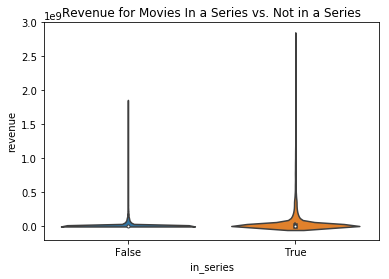

In [33]:
movies['in_series'] = movies.belongs_to_collection.isna() == False
movies.head()#adds column of booleans for if movie is from a series or not
sns.violinplot(x='in_series', y='revenue', data=movies)
plt.title("Revenue for Movies In a Series vs. Not in a Series")
plt.show()

In [ ]:
sns.boxplot(x='in_series', y='revenue', data=movies)
plt.title("Revenue for Movies In a Series vs. Not in a Series")
plt.show()

In [ ]:
movies.groupby('in_series').revenue.mean() #higher revenue for movies in a series

### Research Question 3: Do production companies indeed generate higher revenue for movies in series?

In [25]:
movies_prod = movies.sort_values(by = 'revenue', ascending = False)

In [26]:
prod_companies = movies_prod[pd.notnull(movies_prod['production_companies'])]
prod_companies = prod_companies.sort_values(by = 'revenue', ascending = False)
prod_companies['belongs_to_series'] = prod_companies.belongs_to_collection.isna() == False

#### #1 Warner Bros.

In [27]:
warner_bros = prod_companies[prod_companies['production_companies'].str.contains("Warner Bros.|New Line Cinema|Castle Rock|Turner Entertainment|DC Films")]
print(warner_bros.shape)

(1711, 25)


In [28]:
warner_bros.belongs_to_series.value_counts()

False    1434
True      277
Name: belongs_to_series, dtype: int64

In [29]:
warner_bros = warner_bros.sort_values(by = 'revenue', ascending = False)
warner_bros = warner_bros.iloc[1:101,];
warner_bros.belongs_to_series.value_counts()

True     65
False    35
Name: belongs_to_series, dtype: int64

Out of all of the movies produced by the Warner Bros, 19.3% of the movies belonged to a series. So 277/1711 of Warner Bros. movies were part of a series. Out of the top 100 movies produced by the Warner Bros, 65% of the movies belonged to a series.

#### #2 Sony Pictures

In [ ]:
sony_pictures = prod_companies[prod_companies['production_companies'].str.contains("Sony|TriStar Pictures|Screen Gems|Destination Films|Affirm Films")]

In [30]:
sony_pictures.shape

NameError: name 'sony_pictures' is not defined

In [ ]:
sony_pictures.belongs_to_series.value_counts()

In [ ]:
sony_pictures = sony_pictures.sort_values(by = 'revenue', ascending = False)
sony_pictures = sony_pictures.iloc[1:101,];
sony_pictures.belongs_to_series.value_counts()

Out of all of the movies produced by Sony Pictures, 19.9% of the movies belonged to a series. So 89/448 Sony Pictures movies belonged to a series. Out of the top 100 movies produced by Sony Pictures, 31% of the movies belonged to a series

#### #3 Walt Disney

In [ ]:
walt_disney = prod_companies[prod_companies['production_companies'].str.contains("Disney|Lucas Film|Pixar|Marvel Studios")]

In [ ]:
walt_disney.shape

In [ ]:
walt_disney.belongs_to_series.value_counts()

In [ ]:
walt_disney = walt_disney.sort_values(by = 'revenue', ascending = False)
walt_disney = walt_disney.iloc[1:101,];
walt_disney.belongs_to_series.value_counts()

Out of all of the movies produced by Walt Disney Studios, 33.3% of the movies belonged to a series. Out of the top 100 movies produced by Walt Disney Studios, 60% of the movies belonged to a series.

#### #4 Universal Pictures

In [ ]:
universal_pictures = prod_companies[prod_companies['production_companies'].str.contains("Universal Studios|DreamWorks|Focus Features|Working Title Films")]

In [ ]:
universal_pictures.shape

In [ ]:
universal_pictures.belongs_to_series.value_counts()

In [ ]:
universal_pictures = universal_pictures.sort_values(by = 'revenue', ascending = False)
universal_pictures = universal_pictures.iloc[1:101,];
universal_pictures.belongs_to_series.value_counts()

Out of all of the movies produced by Universal Pictures, 16.5% of the movies belonged to a series. Out of the top 100 movies produced by Universal Pictures, 30% of the movies belonged to a series.

#### #5 20th Century Fox

In [ ]:
century_fox = prod_companies[prod_companies['production_companies'].str.contains("Fox|fox")];

In [ ]:
century_fox.shape

In [ ]:
century_fox.belongs_to_series.value_counts()

In [ ]:
century_fox = century_fox.sort_values(by = 'revenue', ascending = False)
century_fox = century_fox.iloc[1:101,];
century_fox.belongs_to_series.value_counts()

Out of all of the movies produced by 20th Century Fox, 18.0% of the movies belonged to a series. Out of the top 100 movies produced by 20th Century Fox, 55% of the movies belonged to a series.

#### #6 Paramount Pictures

In [ ]:
paramount = prod_companies[prod_companies['production_companies'].str.contains("Paramount|Nickelodean|MTV")];

In [ ]:
paramount.shape

In [ ]:
paramount.belongs_to_series.value_counts()

In [ ]:
paramount = paramount.sort_values(by = 'revenue', ascending = False)
paramount = paramount.iloc[1:101,];
paramount.belongs_to_series.value_counts()

Out of all of the movies produced by Paramount Pictures, 14.2% of the movies belonged to a series. Out of the top 100 movies produced by Paramount Pictures, 51% of the movies belonged to a series.

#### #7 Lionsgate Films

In [ ]:
lionsgate = prod_companies[prod_companies['production_companies'].str.contains("Lionsgate|Roadside Attractions|summmit|Summit|lionsgate|Pantelion|Codeblack")];

In [ ]:
lionsgate.shape

In [ ]:
lionsgate.belongs_to_series.value_counts()

In [ ]:
lionsgate = lionsgate.sort_values(by = 'revenue', ascending = False)
lionsgate = lionsgate.iloc[1:101,];
lionsgate.belongs_to_series.value_counts()

Out of all of the movies produced by Lionsgate Films, 24.9% of the movies belonged to a series. Out of the top 100 movies produced by Lionsgate Films, 36% of the movies belonged to a series.

#### #8 The Weinstein Company

In [ ]:
weinstein = prod_companies[prod_companies['production_companies'].str.contains("Weinstein|Lantern")];

In [ ]:
weinstein.shape

In [ ]:
weinstein.belongs_to_series.value_counts()

Only 11.4% of the movies produced by the Weinstein Company were released as part of a series.

#### #9 Metro-Goldwyn-Mayer Studios

In [ ]:
metro_goldwyn = prod_companies[prod_companies['production_companies'].str.contains("Goldwyn")]

In [ ]:
metro_goldwyn.shape

In [ ]:
metro_goldwyn.belongs_to_series.value_counts()

In [ ]:
metro_goldwyn = metro_goldwyn.sort_values(by = 'revenue', ascending = False)
metro_goldwyn = metro_goldwyn.iloc[1:101,];
metro_goldwyn.belongs_to_series.value_counts()

Out of all of the movies produced by Metro-Goldwyn-Mayer Studios, 8.3% of the movies belonged to a series. Out of the top 100 movies produced by Metro-Goldwyn-Mayer Studios, 37% of the movies belonged to a series.

#### #10 DreamWorks Pictures

dreamworks = prod_companies[prod_companies['production_companies'].str.contains("DreamWorks|dreamworks")];

In [ ]:
dreamworks.shape

In [ ]:
dreamworks.belongs_to_series.value_counts()

In [ ]:
dreamworks = dreamworks.sort_values(by = 'revenue', ascending = False)
dreamworks = dreamworks.iloc[1:101,];
dreamworks.belongs_to_series.value_counts()

Out of all of the movies produced by DreamWorks Pictures, 16.7% of the movies belonged to a series. Out of the top 100 movies produced by Dreamworks Pictures, 23% of the movies belonged to a series.

Overall: Overall, the top 10 production companies showed a much higher proportion of movies in series among their top 100 movies than in all of their movies.

### Research Question 4: Does a director's alma mater have an effect on movie revenue?

In [ ]:
directors = pd.read_csv("director.csv")

In [ ]:
directors = directors.loc[directors.title_year<2016]
directors.groupby('Alma mater').count()['director_name'].sort_values(ascending=False)[:7]

In [ ]:
NYU = directors.loc[directors['Alma mater']=='New York University']
NYU.groupby('title_year').gross.sum().plot(x='title_year', y='gross', color="purple")

USC = directors.loc[directors['Alma mater']=='University of Southern California']
USC.groupby('title_year').gross.sum().plot(x='title_year', y='gross', color="red")

CalArts = directors.loc[directors['Alma mater']=='California Institute of the Arts']
CalArts.groupby('title_year').gross.sum().plot(x='title_year', y='gross', color="yellow")

Harvard = directors.loc[directors['Alma mater']=='Harvard University']
Harvard.groupby('title_year').gross.sum().plot(x='title_year', y='gross', color="green")

Wesleyan = directors.loc[directors['Alma mater']=='Wesleyan University']
Wesleyan.groupby('title_year').gross.sum().plot(x='title_year', y='gross', color="cyan")

Yale = directors.loc[directors['Alma mater']=='Yale University']
Yale.groupby('title_year').gross.sum().plot(x='title_year', y='gross', color="teal")


UCLA = directors.loc[directors['Alma mater']=='University of California, Los Angeles']
UCLA.groupby('title_year').gross.sum().plot(x='title_year', y='gross', color="orange", title="Total Revenue Per School Per Year")

plt.legend(["NYU","USC","CalArts", "Harvard", "Wesleyan", "Yale", "UCLA"], bbox_to_anchor=(1, 0.5))

## Data Modeling: Can we predict revenue for the top 30 grossing movie series of all time?

In [34]:
in_series_df = movies.loc[movies.in_series==True]
in_series_df.shape

(4494, 25)

In [35]:
top_30_series= in_series_df.groupby('belongs_to_collection', as_index=False).sum().iloc[:,[0,1]].sort_values('revenue', ascending=False).reset_index().iloc[:30,:]

In [36]:
import ast

top_30_series['series_name'] = 0
for i in range(0, len(top_30_series)):
    temp = top_30_series.belongs_to_collection.iloc[i]
    temp = ast.literal_eval(temp)
    top_30_series.series_name.iloc[i] = temp['name']

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [37]:
top_30_series.head()

,index,belongs_to_collection,revenue,series_name
0,199,"{'id': 1241, 'name': 'Harry Potter Collection'...",7.707367e+09,Harry Potter Collection
1,3,"{'id': 10, 'name': 'Star Wars Collection', 'po...",7.434495e+09,Star Wars Collection
2,1481,"{'id': 645, 'name': 'James Bond Collection', '...",7.106970e+09,James Bond Collection
3,1641,"{'id': 9485, 'name': 'The Fast and the Furious...",5.125099e+09,The Fast and the Furious Collection
4,840,"{'id': 295, 'name': 'Pirates of the Caribbean ...",4.521577e+09,Pirates of the Caribbean Collection


In [38]:
# creating array of collection/series names
top_30_series_array = top_30_series.series_name
top_30_series_array
s = '|'
top_30_series_array_string = s.join(top_30_series_array)
top_30_series_array_string

'Harry Potter Collection|Star Wars Collection|James Bond Collection|The Fast and the Furious Collection|Pirates of the Caribbean Collection|Transformers Collection|Despicable Me Collection|The Twilight Collection|Ice Age Collection|Jurassic Park Collection|Shrek Collection|The Hunger Games Collection|The Hobbit Collection|The Avengers Collection|The Lord of the Rings Collection|X-Men Collection|Avatar Collection|Mission: Impossible Collection|Spider-Man Collection|The Dark Knight Collection|Iron Man Collection|Madagascar Collection|Captain America Collection|Indiana Jones Collection|Finding Nemo Collection|Toy Story Collection|The Terminator Collection|Kung Fu Panda Collection|Men In Black Collection|The Bourne Collection'

In [39]:
movies_top_30_series_df = in_series_df[in_series_df['belongs_to_collection'].str.contains(top_30_series_array_string)]
movies_top_30_series_df = movies_top_30_series_df[['belongs_to_collection','budget','id','production_companies','release_date','revenue','original_title','runtime','vote_average','vote_count' ]]
movies_top_30_series_df.reset_index()

#converts budget to numeric
for i in range(0,len(movies_top_30_series_df)):
    movies_top_30_series_df.budget.iloc[i] = float(movies_top_30_series_df.budget.iloc[i])

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [40]:
movies_top_30_series_df.head() #data frame of movies that belong to the top 30 grossing series

,belongs_to_collection,budget,id,production_companies,release_date,revenue,original_title,runtime,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,862,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,Toy Story,81.0,7.7,5415.0
9,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,710,"[{'name': 'United Artists', 'id': 60}, {'name'...",1995-11-16,352194034.0,GoldenEye,130.0,6.6,1194.0
256,"{'id': 10, 'name': 'Star Wars Collection', 'po...",11000000,11,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twe...",1977-05-25,775398007.0,Star Wars,121.0,8.1,6778.0
475,"{'id': 328, 'name': 'Jurassic Park Collection'...",63000000,329,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",1993-06-11,920100000.0,Jurassic Park,127.0,7.6,4956.0
582,"{'id': 528, 'name': 'The Terminator Collection...",100000000,280,"[{'name': 'Lightstorm Entertainment', 'id': 57...",1991-07-01,520000000.0,Terminator 2: Judgment Day,137.0,7.7,4274.0


In [41]:
movies_top_30_series_df['series_name'] = 0
for i in range(0, len(movies_top_30_series_df)):
    temp = movies_top_30_series_df.belongs_to_collection.iloc[i]
    temp = ast.literal_eval(temp)
    movies_top_30_series_df.series_name.iloc[i] = temp['name']
    
movies_top_30_series_df.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,belongs_to_collection,budget,id,production_companies,release_date,revenue,original_title,runtime,vote_average,vote_count,series_name
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,862,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,Toy Story,81.0,7.7,5415.0,Toy Story Collection
9,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,710,"[{'name': 'United Artists', 'id': 60}, {'name'...",1995-11-16,352194034.0,GoldenEye,130.0,6.6,1194.0,James Bond Collection
256,"{'id': 10, 'name': 'Star Wars Collection', 'po...",11000000,11,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twe...",1977-05-25,775398007.0,Star Wars,121.0,8.1,6778.0,Star Wars Collection
475,"{'id': 328, 'name': 'Jurassic Park Collection'...",63000000,329,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",1993-06-11,920100000.0,Jurassic Park,127.0,7.6,4956.0,Jurassic Park Collection
582,"{'id': 528, 'name': 'The Terminator Collection...",100000000,280,"[{'name': 'Lightstorm Entertainment', 'id': 57...",1991-07-01,520000000.0,Terminator 2: Judgment Day,137.0,7.7,4274.0,The Terminator Collection


### OLS Model: Predicting Revenue for Movies in Top 30 Grossing Movie Series

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [ ]:
movies_top_30_series_df.corr()

In [ ]:
print(sns.pairplot(movies_top_30_series_df[['revenue', 'budget','runtime','vote_average','vote_count']]))

Based on this correlation matrix, we can see a strong correlation between revenue and vote count and budget, for movies in the top 30 grossing series. We decided to build an OLS model to predict revenue from the numeric factors in the dataset. We created 4 OLS models, each model adding a predictor, so that we could see how each additional predictor affects the prediction.

The first OLS model only uses vote count to predict revenue as vote count is the highest correlated with revenue. The R-squared value is decent.

In [ ]:
ols_model1 = smf.ols('revenue ~ vote_count', data=movies_top_30_series_df)
ols_model1.fit().summary()

The second OLS model predicts revenue from vote count and budget, as these are the 2 factors that are most highly correlated with revenue. The R-squared value improves a little bit.

In [ ]:
ols_model2 = smf.ols('revenue ~ vote_count + budget', data=movies_top_30_series_df)
ols_model2.fit().summary()

The third OLS model predicts revenue from vote count and budget and runtime, even though runtime is not as highly correlated with revenue. The R-squared value does not improve.

In [ ]:
ols_model3 = smf.ols('revenue ~ vote_count + budget + runtime', data=movies_top_30_series_df)
ols_model3.fit().summary()

The fourth OLS model predicts revenue from vote count and budget and runtime and vote average, even though runtime and vote average are not highly correlated with revenue. The R-squared value does not improve by much at all.

In [ ]:
ols_model4 = smf.ols('revenue ~ vote_count + budget + runtime + vote_average', data=movies_top_30_series_df)
ols_model4.fit().summary()

Conclusions: Based on these models, we can see that vote count and budget are the factors most correlated with movie revenue.